In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/DataSource/heatingOilTrainingset.csv'
df_dataset = pd.read_csv(path)
# Dataset is now stored in a Pandas DataFrame
df_dataset

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5
1214,5,78,129,1,22.5,1
1215,5,77,138,3,26.8,1
1216,3,89,156,2,34.0,2


In [ ]:
df=pd.DataFrame(df_dataset)
df.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


## Business Understanding

Melvi Aprilia, the regional sales manager she is back for more help. Business is booming, her sales team is signing up thousands of new clients, and she wants to be sure the company will be able to meet this new level of demand. She was so pleased with our assistance in finding correlations in her data, she now is hoping we can help her do some prediction as well. She knows that there is some correlation between the attributes in her data set (things like temperature, insulation, and occupant ages), and she's now wondering if she can use the data set to predict heating oil usage for new customers. You see, these new customers haven't begun consuming heating oil yet, there are a lot of them (42,650 to be exact), and she wants to know how much oil she needs to expect to keep in stock in order to meet these new customers' demand. Can she use data mining to examine household attributes and known past consumption quantities to anticipate and meet her new customers' needs?

Case Problem : Estimasi

Judul : Penerapan Machine Learning untuk Mengamankan Stock level Heating Oil menggunakan Pendekatan analisa prediktif.

Predictive Stock level Heating Oil

Jenis ML : Supervised Learning

Data Training:
Valid Historikal penjualan Heating Oil dengan merekap form pelanggan, insulation, temperature, avg age, home size, num of occupant.

Kemungkinan Algoritma Estimasi yg akan digunakan:

1.   Linear Regresion
2.   MLP Regresor ( Artificial neural Network )



## Data Understanding


*  Insulation: This is a density rating, ranging from one to ten, indicating the thickness of
each home’s insulation. A home with a density rating of one is poorly insulated, while a
home with a density of ten has excellent insulation.
* Temperature: This is the average outdoor ambient temperature at each home for the
most recent year, measure in degree Fahrenheit.
* Heating_Oil: This is the total number of units of heating oil purchased by the owner of
each home in the most recent year.
* Num_Occupants: This is the total number of occupants living in each home.
* Avg_Age: This is the average age of those occupants.
* Home_Size: This is a rating, on a scale of one to eight, of the home's overall size. The
higher the number, the larger the home


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


In [ ]:
df.isnull().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

# Syarat dari penyelesaian problem estimasi: tidak ada variable kategorik(harus numeric semua)

1. Tidak perlu melakukan konversi data, disebabkan semua variabel NUMERIK
2. Tidak perlu dilakukan handling missing value, disebabkan datanya bebas missing value

## Tidak perlu melakukan Data preparation karena data yang diperoleh sudah sesuai dan tidak ada problem.

# Pemodelan Data

# Linear Regression

<Axes: title={'center': 'Pearson Correlation'}>

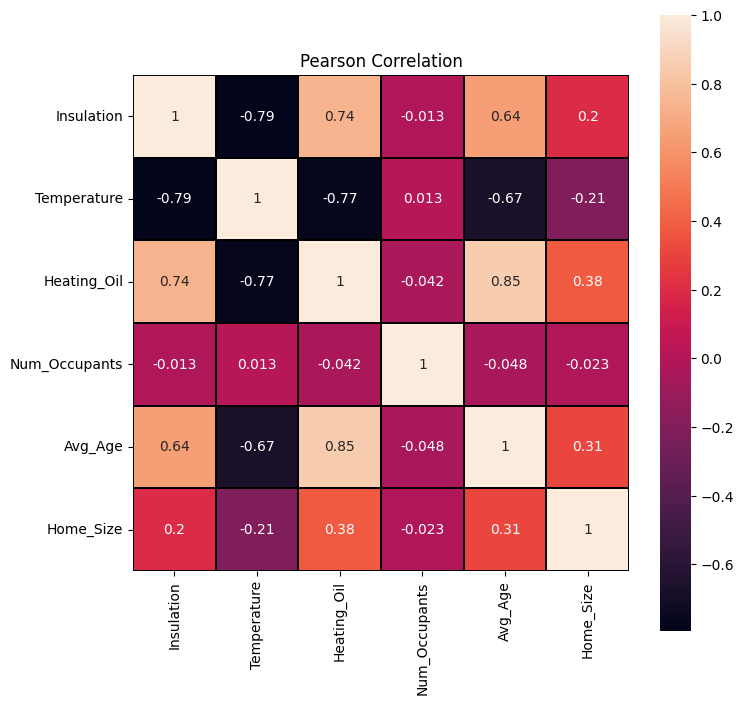

In [ ]:
f,ax=plt.subplots(figsize=(8,8))
plt.title("Pearson Correlation")
sns.heatmap(df.astype(float).corr(),linewidth=0.25, vmax=1.0, square=True, cmap='rocket', linecolor='black', annot=True)

In [ ]:
# Menentukan Input Variabel

x=df[['Insulation','Temperature','Num_Occupants','Avg_Age','Home_Size']]

# Menentukan Target variabel
y=df['Heating_Oil']

In [ ]:
x

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,6,74,4,23.8,4
1,10,43,4,56.7,4
2,3,81,2,28.0,6
3,9,50,4,45.1,3
4,2,80,5,20.8,2
...,...,...,...,...,...
1213,7,56,5,58.2,5
1214,5,78,1,22.5,1
1215,5,77,3,26.8,1
1216,3,89,2,34.0,2


In [ ]:
y

0       132
1       263
2       145
3       196
4       131
       ... 
1213    264
1214    129
1215    138
1216    156
1217    273
Name: Heating_Oil, Length: 1218, dtype: int64

In [ ]:
# untuk split data kita menjadi training dan testing
from sklearn.model_selection import train_test_split
# untuk Linear model
from sklearn.linear_model import LinearRegression
# untuk evaluasi model
from sklearn import metrics

In [ ]:
# untuk split data kita menjadi training dan testing, SPLIT 70% Training dan 30% Testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
x_train

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
579,6,75,5,24.1,3
1146,3,87,2,33.6,8
188,5,75,2,21.8,2
491,3,80,2,25.4,8
1217,7,59,1,61.4,5
...,...,...,...,...,...
1033,3,82,5,27.0,3
763,5,76,2,41.3,7
835,3,80,4,23.3,4
559,7,55,3,61.6,7


In [ ]:
y_train

579     131
1146    156
188     131
491     134
1217    273
       ... 
1033    146
763     183
835     127
559     273
684     142
Name: Heating_Oil, Length: 852, dtype: int64

# Linear Regression

In [ ]:
reg_ln=LinearRegression()

reg_ln

LinearRegression()

In [ ]:
# Training Model
model_ln=reg_ln.fit(x_train,y_train)

In [ ]:
# Predict Model

y_pred_reg=model_ln.predict(x_test)

In [ ]:
# Evaluasi Linear Regression

print('r2_score :', metrics.r2_score(y_test, y_pred_reg))

r2_score : 0.8113322126382521


In [ ]:
# Membuat Script MAPE

def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred_reg))

MAPE : 7.845552048912459


## Hasil Evaluasi pada Linear Regression

Baik

Karena :

R2 menunjukkan nilai 0.81 mendekati 1, artinya untuk menjadi excelent hanya kurang  = 0.2.

MAPE = 7.8, Artinya tingkat error = 7.8% dan Tingkat kesuksesan = 92.2%.

# Pemodelan dengan MLP Regressor (ANN = Artificial Neural Network)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
#Object MLP Regressor
mlp_reg=MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=200)

#Training Model
model_mlp=mlp_reg.fit(x_train,y_train)

# Predict Model

y_pred_mlp=model_mlp.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Evaluasi MLP Regressor

print('r2_score :', metrics.r2_score(y_test, y_pred_mlp))

r2_score : 0.9194223835398501


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred_mlp))

MAPE : 5.213766131952187


## Hasil evaluasi pemodelan Neural Network (MLP Regressor)

1. R2 =  0.91 dalam kategori baik
2. Mape = 5.69% artinya ketepatan model = 94.31%

Setelah melakukan Tunning parameter Maka Model terbaik adalah MLP Regressor (dengan menambahkan 3 hidden layer) dengan MAPE 5,69% artinya tingkat kegagalan 5.69% dan tingkat keakuratan 94.31%, R2=0.91

# Implement Model ke data baru ( Implement Model to MACHINE LEARNING )

Model yang kita gunakan adalah MLP Regressor (ANN = Artificial Neural Network)

In [ ]:
# Loading new customer Dataset

path1 = '/content/drive/MyDrive/DataSource/heatingOilNewust.csv'
df_dataset1 = pd.read_csv(path1)
# Dataset is now stored in a Pandas DataFrame
df_dataset1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


In [ ]:
df1=pd.DataFrame(df_dataset1)

df1

# Tidak ada field Heating Oil,karena ini adalah data customer baru yang memang belum pernah melakukan pembelian

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


## Data Preparation

1. Select Input Variabel

In [ ]:
x1=df1[['Insulation','Temperature','Num_Occupants','Avg_Age','Home_Size']]

x1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


## Applying Model

In [ ]:
y_predict_mlp=model_mlp.predict(x1)

y_predict_mlp

array([280.2392321 , 203.42075196, 218.49011751, ..., 123.37759212,
       277.86878226, 228.26635789])

In [ ]:
# Mengubah hasil pemodelan yg berbentuk Array menjadi DataFrame
df_y_predict_mlp=pd.DataFrame({'Prediction_HeatingOil':y_predict_mlp}).round(2)

df_y_predict_mlp

,Prediction_HeatingOil
0,280.24
1,203.42
2,218.49
3,214.97
4,143.31
...,...
42645,249.08
42646,195.56
42647,123.38
42648,277.87


In [ ]:
# Menggabungkan Dataset NewCustomer dengan Hasil Predict nya

df_hasil_predict_mlp=pd.concat([df1,df_y_predict_mlp], sort=False, axis=1)

df_hasil_predict_mlp.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction_HeatingOil
0,5,69,10,70.1,7,280.24
1,5,80,1,66.7,1,203.42
2,4,89,9,67.8,7,218.49
3,7,81,9,52.4,6,214.97
4,4,58,8,22.9,7,143.31


In [ ]:
# Export to excel

# Export as download if in colab
from google.colab import files

file_predict_heatingOil=df_hasil_predict_mlp.to_excel('file_predict_heatingOil.xlsx', sheet_name='predict')
files.download('file_predict_heatingOil.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_hasil_predict_mlp['Prediction_HeatingOil'].sum()

8577660.129999999

# Jumlah Stock yang dibutuhkan bu Melvi untuk coverage New Customer dan Old Customer

In [ ]:
newCust=df_hasil_predict_mlp['Prediction_HeatingOil'].sum()
OldCust=df['Heating_Oil'].sum()

stock=newCust+OldCust

print('Kebutuhan NewCust :', newCust)
print('Kebutuhan OldCust :', OldCust)

stock

Kebutuhan NewCust : 8577660.129999999
Kebutuhan OldCust : 240426


8818086.129999999